In [1]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
# import libraries
import pandas as pd
import plotly.graph_objects as go

You can download the data from [here](https://drive.google.com/file/d/133YQJmxyukqd-LiSU8_AZARjDVjysKns/view?usp=sharing).

In [3]:
# load data
df = pd.read_csv('restaurants.csv')

### explore data

In [4]:
df.shape

(2198, 5)

In [5]:
df.head(10)

,POS,MenuItem,weekday,hour,Qty
0,RESTAURANT_1,BOILED EGG,Friday,0,60
1,RESTAURANT_1,BOILED EGG,Friday,1,43
2,RESTAURANT_1,BOILED EGG,Friday,2,16
3,RESTAURANT_1,BOILED EGG,Friday,3,8
4,RESTAURANT_1,BOILED EGG,Friday,4,13
5,RESTAURANT_1,BOILED EGG,Friday,5,1
6,RESTAURANT_1,BOILED EGG,Friday,6,1
7,RESTAURANT_1,BOILED EGG,Friday,7,5
8,RESTAURANT_1,BOILED EGG,Friday,8,5
9,RESTAURANT_1,BOILED EGG,Friday,9,1


In [6]:
df.dtypes

POS         object
MenuItem    object
weekday     object
hour         int64
Qty          int64
dtype: object

In [7]:
df.describe()

,hour,Qty
count,2198.000000,2198.000000
mean,11.666970,160.969063
std,6.944353,394.587231
min,0.000000,1.000000
25%,6.000000,15.000000
50%,12.000000,45.000000
75%,18.000000,158.750000
max,23.000000,4664.000000


In [8]:
df.nunique()

POS           2
MenuItem      7
weekday       7
hour         24
Qty         508
dtype: int64

In [9]:
df['POS'].unique()

array(['RESTAURANT_1', 'RESTAURANT_2'], dtype=object)

In [10]:
df['POS'].value_counts()

RESTAURANT_1    1106
RESTAURANT_2    1092
Name: POS, dtype: int64

In [11]:
df['MenuItem'].unique()

array(['BOILED EGG', 'BUFFET LUNCH', 'BUTTER CHICKEN', 'CHICKEN 65',
       'CHICKEN BIRIYANI', 'CHICKEN BIRIYANI BASMATHI',
       'CHICKEN FRIED RICE'], dtype=object)

In [12]:
df['MenuItem'].value_counts()

CHICKEN BIRIYANI             336
BUTTER CHICKEN               336
CHICKEN FRIED RICE           334
CHICKEN BIRIYANI BASMATHI    334
CHICKEN 65                   318
BOILED EGG                   310
BUFFET LUNCH                 230
Name: MenuItem, dtype: int64

In [13]:
df['weekday'].unique()

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [14]:
df['weekday'].value_counts()

Monday       323
Saturday     321
Wednesday    316
Thursday     315
Sunday       314
Tuesday      307
Friday       302
Name: weekday, dtype: int64

In [15]:
df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 10, 11])

In [16]:
df['hour'].value_counts()

19    98
17    98
15    98
13    98
14    98
16    98
18    98
12    97
20    94
23    93
2     93
0     93
21    91
3     91
5     91
1     90
4     90
22    90
10    86
6     86
7     84
8     83
11    81
9     79
Name: hour, dtype: int64

In [17]:
df['Qty'].value_counts()

1       66
2       58
3       50
5       41
4       40
        ..
492      1
490      1
488      1
480      1
1874     1
Name: Qty, Length: 508, dtype: int64

## Heatmaps

Create the heatmap with the quantity (Qty) of **'BUTTER CHICKEN'** sold in **'RESTAURANT_1'** during  the week.

**Weekday** should be on the **x-axis** and **hour** on the **y-axis**. Cells in the heatmap should be colorred according to quantity.

In [18]:
df_h = df[(df['POS'] == 'RESTAURANT_1') & (df['MenuItem'] == 'BUTTER CHICKEN')]
df_h.head(10)

,POS,MenuItem,weekday,hour,Qty
274,RESTAURANT_1,BUTTER CHICKEN,Friday,0,673
275,RESTAURANT_1,BUTTER CHICKEN,Friday,1,944
276,RESTAURANT_1,BUTTER CHICKEN,Friday,2,658
277,RESTAURANT_1,BUTTER CHICKEN,Friday,3,423
278,RESTAURANT_1,BUTTER CHICKEN,Friday,4,246
279,RESTAURANT_1,BUTTER CHICKEN,Friday,5,106
280,RESTAURANT_1,BUTTER CHICKEN,Friday,6,61
281,RESTAURANT_1,BUTTER CHICKEN,Friday,7,35
282,RESTAURANT_1,BUTTER CHICKEN,Friday,8,37
283,RESTAURANT_1,BUTTER CHICKEN,Friday,9,45


In [19]:
df_h.shape

(168, 5)

In [20]:
df_h.describe()

,hour,Qty
count,168.000000,168.000000
mean,11.500000,326.107143
std,6.942881,308.998073
min,0.000000,15.000000
25%,5.750000,92.500000
50%,11.500000,242.500000
75%,17.250000,458.250000
max,23.000000,1884.000000


In [21]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [22]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
df_h['weekday'] = df_h['weekday'].astype(cat_type)

<ipython-input-22-9227cfe6a134>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_h.dtypes

POS           object
MenuItem      object
weekday     category
hour           int64
Qty            int64
dtype: object

In [24]:
df_h.sort_values(by='weekday', inplace=True)
df_h.head(10)

<ipython-input-24-ecef783690c3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,POS,MenuItem,weekday,hour,Qty
321,RESTAURANT_1,BUTTER CHICKEN,Monday,23,479
301,RESTAURANT_1,BUTTER CHICKEN,Monday,3,293
302,RESTAURANT_1,BUTTER CHICKEN,Monday,4,246
303,RESTAURANT_1,BUTTER CHICKEN,Monday,5,236
304,RESTAURANT_1,BUTTER CHICKEN,Monday,6,188
305,RESTAURANT_1,BUTTER CHICKEN,Monday,7,111
306,RESTAURANT_1,BUTTER CHICKEN,Monday,8,47
307,RESTAURANT_1,BUTTER CHICKEN,Monday,9,24
308,RESTAURANT_1,BUTTER CHICKEN,Monday,10,26
309,RESTAURANT_1,BUTTER CHICKEN,Monday,11,31


In [25]:
pd.pivot_table(df_h, values='Qty', index='hour', 
               columns='weekday').sort_index(ascending=False)

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
23,479,499,469,494,597,762,699
22,368,405,375,404,496,666,636
21,386,380,329,371,431,592,604
20,281,233,252,243,305,402,513
19,172,145,144,146,169,230,275
18,590,100,94,114,122,194,212
17,719,140,99,150,183,307,304
16,804,204,159,203,207,403,371
15,859,220,239,234,255,449,547


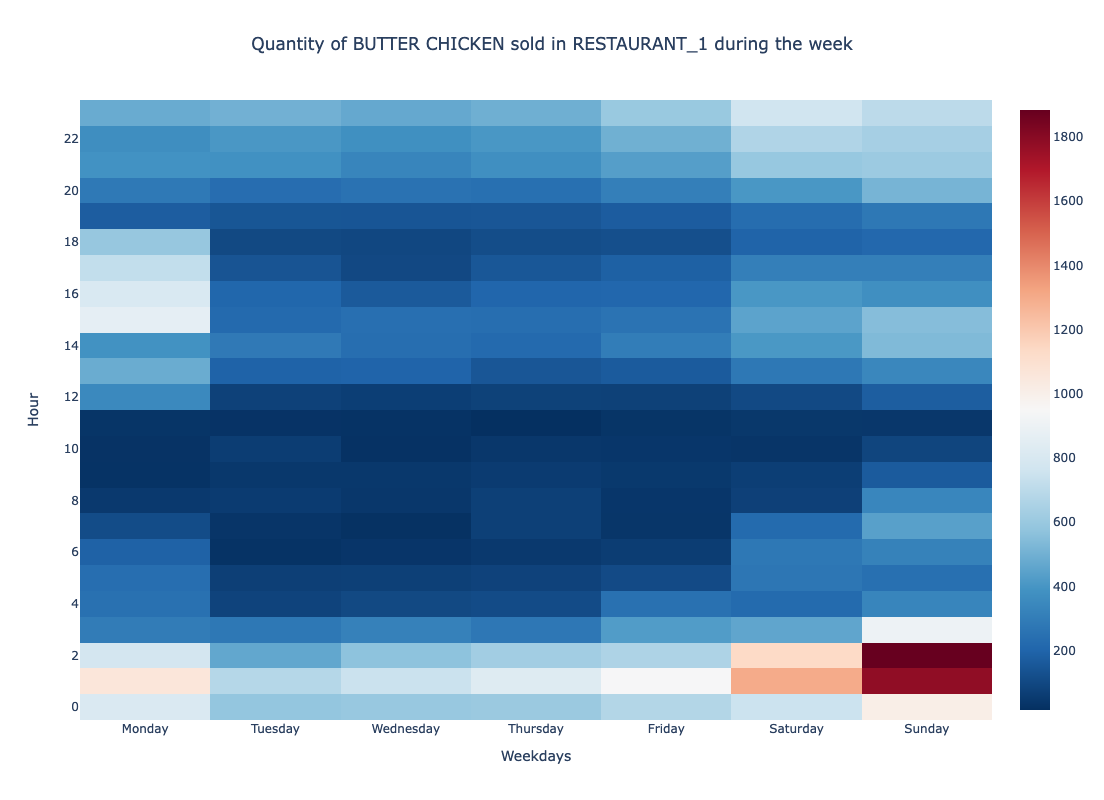

In [57]:
data = [go.Heatmap(
    x = df_h['weekday'],
    y = df_h['hour'],
    z = df_h['Qty'],
#    colorbar = {
#        'len' : 2,
#        'tickmode': 'linear',
#        'tick0': 0,
#        'dtick': 50
#    },
    colorscale = 'Rdbu',
    reversescale = True
)]

layout = go.Layout(
    title = {
        'text': 'Quantity of BUTTER CHICKEN sold in RESTAURANT_1 during the week',
        'x': 0.5},
    xaxis = dict(title = 'Weekdays'), 
    yaxis = {'title' : 'Hour',
             'tick0' : 0,
             'dtick' : 2
        },
    autosize = False,
    width = 800,
    height = 800,
)

fig = go.Figure(data=data, layout=layout)
fig.show()

I asked a mentor to review the exercise with me.  At 1:15 PM on February 23, 
I made an assistance request to the mentor Eric Elmoznino.  His comments 
are below and after each question.

Change the colorbar so that it diverges between 2 colors.  We just need to see 
the difference between high and low values.  We cannot see the fine grain 
difference between colors corresponding to a small change in values 
(Ex: The difference in color between the values 40 and 50 
if the range of values is from 0 to 2000.)

For more information on color palettes, check the following link 
and in particular the section on Diverging color palettes.
https://seaborn.pydata.org/tutorial/color_palettes.html

You should a color palette similar to 'vlag' in the above link, 
where red and blue represent the extremes and white is the average.

Note that I had originally chosen 'Rainbow' for the color palette.

## Radar chart

Which restaurant does sell more during the specific days of the week? Use radar chart to compare two restaurants.

In [27]:
import numpy as np

In [28]:
df_1 = df.copy()

In [29]:
df_1['weekday'] = df_1['weekday'].astype(cat_type)

In [30]:
df_1.dtypes

POS           object
MenuItem      object
weekday     category
hour           int64
Qty            int64
dtype: object

In [31]:
df_rc = pd.pivot_table(df_1, values='Qty', index='POS', columns='weekday', aggfunc=np.sum)
df_rc

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
POS,,,,,,,
RESTAURANT_1,36720,24900,26325,24823,31581,36788,46639
RESTAURANT_2,13611,17475,18165,16104,16627,17404,26648


In [32]:
df_rc.index

Index(['RESTAURANT_1', 'RESTAURANT_2'], dtype='object', name='POS')

In [33]:
df_rc.columns

CategoricalIndex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, name='weekday', dtype='category')

In [34]:
df_rc.loc['RESTAURANT_1', 'Monday']

36720

In [35]:
df_rc.loc['RESTAURANT_1'].values

array([36720, 24900, 26325, 24823, 31581, 36788, 46639])

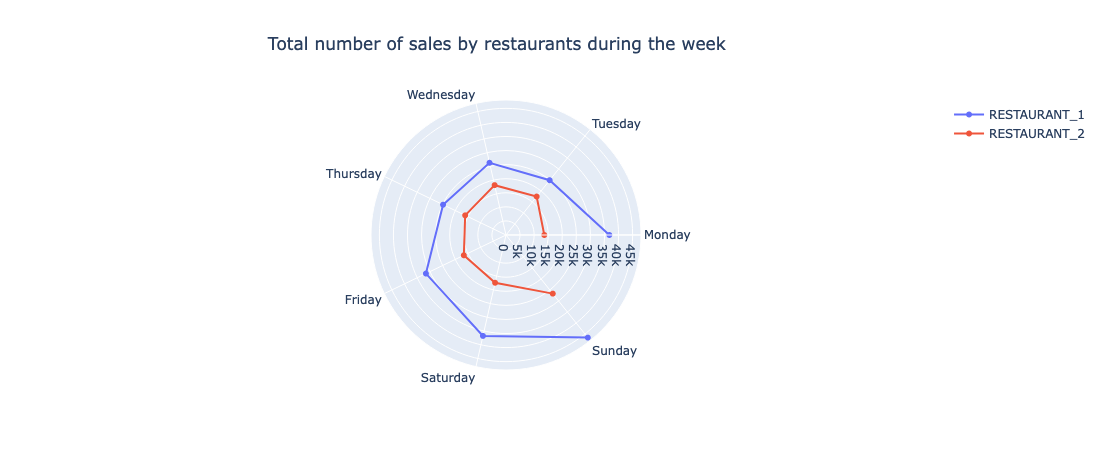

In [36]:
trace1 = go.Scatterpolar(
    name = 'RESTAURANT_1',
    r = df_rc.loc['RESTAURANT_1'].values,
    theta = df_rc.loc['RESTAURANT_1'].index
)

trace2 = go.Scatterpolar(
    name = 'RESTAURANT_2',
    r = df_rc.loc['RESTAURANT_2'].values,
    theta = df_rc.loc['RESTAURANT_2'].index
)

data = [trace1, trace2] 

layout = go.Layout(
    title = {
        'text': 'Total number of sales by restaurants during the week',
        'x': 0.45},
)

fig = go.Figure(data=data, layout=layout)
fig.show()

From the radar chart, RESTAURANT_1 sells more than RESTAURANT_2 for every day of the week.

At 1:15 PM on February 23, I made an assistance request to 
the mentor Eric Elmoznino.  His comments are below. 

There is more information in the radar chart than which restaurant sells more 
during specific days.  For example, for each restaurant, business activity is 
the same for Tuesday, Wednesday, and Thursday (Also, note that the line 
segments connecting the days during this period are parallel).  Also, 
on Monday, RESTAURANT_1 has its second busiest day 
but RESTAURANT_2 has its least busy day.

## Bubble chart

Create bubble chart where the size of bubbles is the quantity of each **MenuItem**.
Place **weekday** on the **x-axis** and **hour** on the **y-axis**. Color the bubbles according to MenuItem.

In [37]:
df_1.head(10)

,POS,MenuItem,weekday,hour,Qty
0,RESTAURANT_1,BOILED EGG,Friday,0,60
1,RESTAURANT_1,BOILED EGG,Friday,1,43
2,RESTAURANT_1,BOILED EGG,Friday,2,16
3,RESTAURANT_1,BOILED EGG,Friday,3,8
4,RESTAURANT_1,BOILED EGG,Friday,4,13
5,RESTAURANT_1,BOILED EGG,Friday,5,1
6,RESTAURANT_1,BOILED EGG,Friday,6,1
7,RESTAURANT_1,BOILED EGG,Friday,7,5
8,RESTAURANT_1,BOILED EGG,Friday,8,5
9,RESTAURANT_1,BOILED EGG,Friday,9,1


In [38]:
df_bc = df_1.groupby(['MenuItem', 'weekday', 'hour'], as_index=False).sum()
df_bc.head(10)

,MenuItem,weekday,hour,Qty
0,BOILED EGG,Monday,0,79.0
1,BOILED EGG,Monday,1,47.0
2,BOILED EGG,Monday,2,33.0
3,BOILED EGG,Monday,3,16.0
4,BOILED EGG,Monday,4,12.0
5,BOILED EGG,Monday,5,12.0
6,BOILED EGG,Monday,6,9.0
7,BOILED EGG,Monday,7,4.0
8,BOILED EGG,Monday,8,4.0
9,BOILED EGG,Monday,9,5.0


In [39]:
df_bc.shape

(1176, 4)

In [40]:
df_bc.describe()

,hour,Qty
count,1176.000000,1134.000000
mean,11.500000,312.001764
std,6.925132,737.155482
min,0.000000,1.000000
25%,5.750000,35.000000
50%,11.500000,96.500000
75%,17.250000,337.000000
max,23.000000,9317.000000


In [41]:
df_bc.isnull().sum()

MenuItem     0
weekday      0
hour         0
Qty         42
dtype: int64

In [42]:
df_bc[df_bc['Qty'].isnull()]

,MenuItem,weekday,hour,Qty
32,BOILED EGG,Tuesday,8,NaN
57,BOILED EGG,Wednesday,9,NaN
106,BOILED EGG,Friday,10,NaN
107,BOILED EGG,Friday,11,NaN
172,BUFFET LUNCH,Monday,4,NaN
174,BUFFET LUNCH,Monday,6,NaN
175,BUFFET LUNCH,Monday,7,NaN
176,BUFFET LUNCH,Monday,8,NaN
177,BUFFET LUNCH,Monday,9,NaN
193,BUFFET LUNCH,Tuesday,1,NaN


In [43]:
df_bc['Qty'].fillna(0, inplace=True)

In [44]:
df_bc.isnull().sum()

MenuItem    0
weekday     0
hour        0
Qty         0
dtype: int64

In [45]:
df_bc.describe()

,hour,Qty
count,1176.000000,1176.000000
mean,11.500000,300.858844
std,6.925132,726.174847
min,0.000000,0.000000
25%,5.750000,30.000000
50%,11.500000,88.000000
75%,17.250000,324.000000
max,23.000000,9317.000000


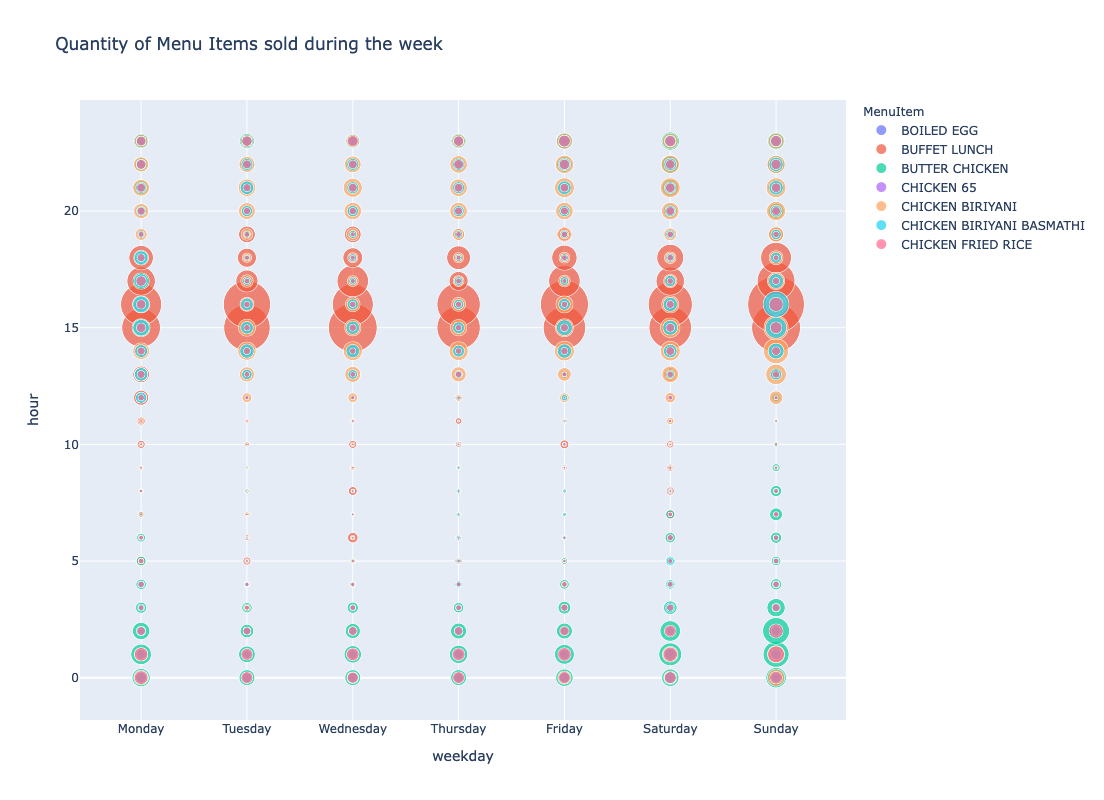

In [46]:
import plotly.express as px


fig = px.scatter(df_bc, x = "weekday", y = "hour", size="Qty", 
                 color="MenuItem", size_max = 40, 
                title = "Quantity of Menu Items sold during the week", 
                width = 800, height = 800
                )
fig.show()

In [47]:
foods = df['MenuItem'].unique()

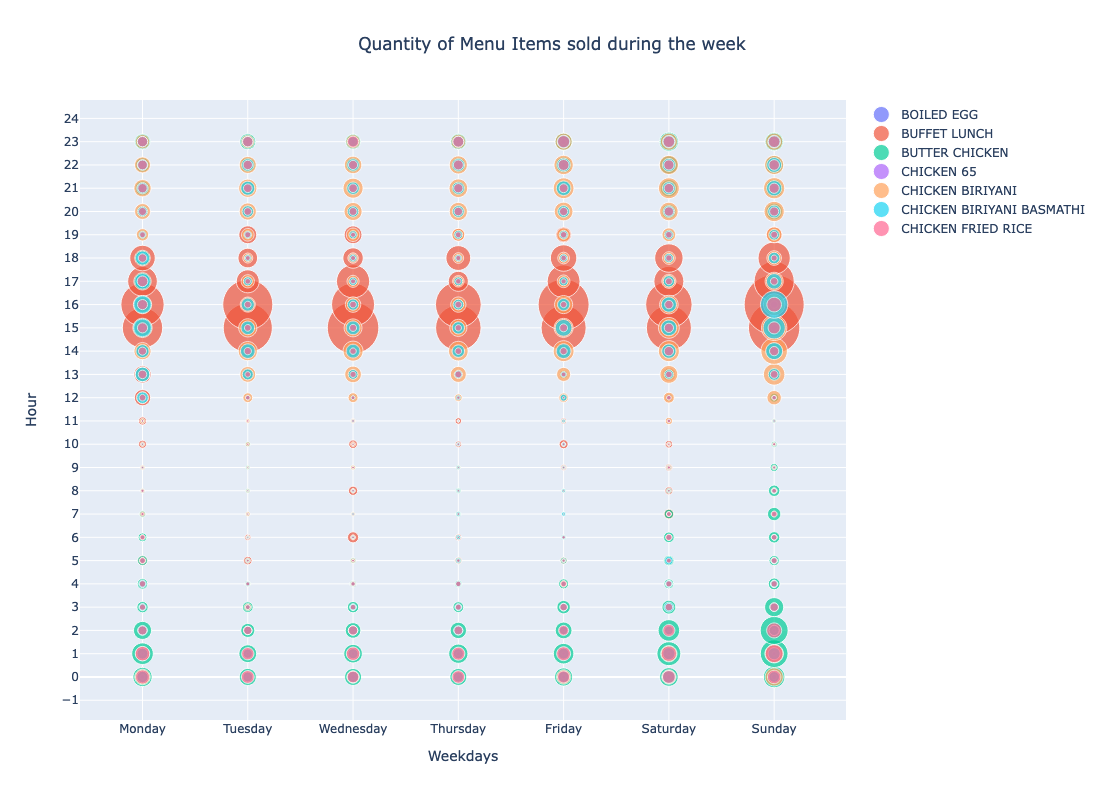

In [48]:
data = []
for food in foods:
    
    trace = go.Scatter(
        name = food,
        x = df_bc[(df_bc['MenuItem'] == food)]['weekday'],
        y = df_bc[(df_bc['MenuItem'] == food)]['hour'],        
        mode = 'markers',
        marker = {
            'size': df_bc[(df_bc['MenuItem'] == food)]['Qty'],
            'sizemode': 'area',
            'sizeref': 2. * max(df_bc['Qty']) / (60.**2)
        },
        hovertemplate = 
        f'MenuItem = {food}<br>'
        'Weekday = %{x}<br>'+
        'Hour = %{y}<br>'+
        'Quantity = %{marker.size}<br>',
        hoverlabel = {'namelength': 0}
    )
    data.append(trace)

# create the layout
layout = go.Layout(
    title = {
        'text': 'Quantity of Menu Items sold during the week',
        'x': 0.5},
    hovermode = 'closest',
    xaxis = dict(title = 'Weekdays'), 
    yaxis = {'title' : 'Hour',
             'tick0' : 0,
             'dtick' : 1
        },
    autosize = False,
    width = 800,
    height = 800,
)


# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

At 1:15 PM on February 23, I made an assistance request to 
the mentor Eric Elmoznino.  His comments are below. 

He said that what I have above is okay for the exercise.  You could use a 
swarm plot to deal with overlapping points but you would not be able to alter 
the size of the points or make bubbles.

He is not sure if bubble charts are the 
appropriate visualization for this question.